In [149]:
from nvidia.dali import pipeline_def
import nvidia.dali.fn as fn
import nvidia.dali.types as types
import numpy as np
import matplotlib.pyplot as plt
import math
import os.path

# test_data_root = os.environ["DALI_EXTRA_PATH"]
# db_folder = os.path.join(test_data_root, "db", "lmdb")

In [ ]:
import nvidia.dali as dali
from nvidia.dali.pipeline import Pipeline
import nvidia.dali.ops as ops
import numpy as np
import nvidia.dali.fn as fn
import nvidia.dali.types as types
import torch

batch_size=1
pipe = Pipeline(batch_size=batch_size, num_threads=4, device_id=0, exec_dynamic=True)
input, _ = fn.file_reader(file_root="/hdd1t/mduc/ocr/lib_ocr/experiment/img", shard_id=0, num_shards=1)

decoded_cpu = fn.image_decoder(input, output_type=types.RGB, device="cpu")

# images = fn.resize(decoded_cpu, resize_y=100, dtype=types.FLOAT)

images_temp = fn.rotate(decoded_cpu, angle=fn.random.uniform(range=[-1, 1]))

images_scaled = fn.resize(images_temp, resize_y=100, dtype=types.FLOAT)

images_color = fn.color_twist(images_scaled, brightness=fn.random.uniform(range=[0.8, 1.2]), contrast=fn.random.uniform(range=[0.8, 1.2]), saturation=fn.random.uniform(range=[0.8, 1.2]), hue=fn.random.uniform(range=[0, 0.3]))

# images_scale = fn.transforms.scale(images, scale=(0.9, 1)) # CPU
images_scale = fn.warp_affine(images_color, matrix=fn.transforms.scale(scale=fn.random.uniform(range=[0.9, 1], shape=[2])), fill_value=0, inverse_map=False) 

image_noise = fn.noise.gaussian(images_scale, mean=0.0, stddev=fn.random.uniform(range=[-10, 10])) 

# images_gpu = image_noise.gpu()
# image_jitter = fn.jitter(images_gpu, nDegree=3).cpu()

pipe.set_outputs(images_temp, images_scaled, images_color, images_scale, image_noise)
pipe.build()
for _ in range(3):
    out = pipe.run()
    print(out[0].as_array(), out[1].as_cpu().as_array())
    print("*"*50)

[[[[ 68  64   1]
   [ 68  64   1]
   [ 69  63   3]
   ...
   [ 52  53   3]
   [ 50  52   2]
   [ 50  52   2]]

  [[ 68  64   1]
   [ 68  64   1]
   [ 69  63   3]
   ...
   [ 53  53   3]
   [ 50  52   2]
   [ 50  52   2]]

  [[ 68  64   0]
   [ 68  64   1]
   [ 70  63   1]
   ...
   [ 53  54   5]
   [ 52  54   3]
   [ 52  54   3]]

  ...

  [[254 229   3]
   [254 229   3]
   [254 229   3]
   ...
   [253 241   3]
   [254 240   3]
   [255 240   3]]

  [[253 232   1]
   [253 232   1]
   [253 232   1]
   ...
   [253 242   2]
   [254 241   2]
   [254 241   2]]

  [[253 235   1]
   [253 235   1]
   [253 235   1]
   ...
   [253 242   2]
   [254 241   2]
   [254 241   2]]]] [[[[6.8000000e+01 6.4000000e+01 1.0000000e+00]
   [6.8729530e+01 6.3270466e+01 2.2258103e+00]
   [6.8676994e+01 6.3323006e+01 1.1601976e+00]
   ...
   [5.2846561e+01 5.5485859e+01 2.9029267e+00]
   [5.1675171e+01 5.2962803e+01 2.6474531e+00]
   [4.9999996e+01 5.1999996e+01 1.9999999e+00]]

  [[6.8000000e+01 6.4000000e+01 7.1

/hdd1t/mduc/.conda/envs/ocr/lib/python3.11/site-packages/nvidia/dali/ops/__init__.py:398: DeprecationWarning: WARNING: `nvidia.dali.fn.file_reader` is now deprecated. Use `nvidia.dali.fn.readers.file` instead.
In DALI 1.0 all readers were moved into a dedicated :mod:`~nvidia.dali.fn.readers`
submodule and renamed to follow a common pattern. This is a placeholder operator with identical
functionality to allow for backward compatibility.
  _handle_op_deprecation(
/hdd1t/mduc/.conda/envs/ocr/lib/python3.11/site-packages/nvidia/dali/ops/__init__.py:398: DeprecationWarning: WARNING: `nvidia.dali.fn.image_decoder` is now deprecated. Use `nvidia.dali.fn.decoders.image` instead.
In DALI 1.0 all decoders were moved into a dedicated :mod:`~nvidia.dali.fn.decoders`
submodule and renamed to follow a common pattern. This is a placeholder operator with identical
functionality to allow for backward compatibility.
  _handle_op_deprecation(


In [151]:
pipe_out = pipe.run()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.009797937..1.1051884].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1048524].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14457966..1.2131382].


Affine transform matrix:
[[[ 68.34011    63.659897    1.5769162]
  [ 68.95789    63.042114    1.8332909]
  [ 68.153496   63.84652     1.0466146]
  ...
  [ 52.9967     54.264584    3.1501994]
  [ 50.998417   52.375114    2.345802 ]
  [ 50.303707   52.30371     2.303704 ]]

 [[ 68.3401     63.659897    1.3401034]
  [ 68.95789    63.04211     1.9578933]
  [ 68.15349    63.84651     1.1534872]
  ...
  [ 53.306988   54.926228    4.4051394]
  [ 52.221745   54.169327    3.3812742]
  [ 51.582657   54.15176     3.0000005]]

 [[ 68.3401     63.659897    1.3401034]
  [ 69.08665    63.03381     1.8457557]
  [ 68.47281    63.679516    1.1232074]
  ...
  [ 53.388557   55.136208    4.2091937]
  [ 52.958435   55.678513    3.1486967]
  [ 52.8254     55.825397    3.       ]]

 ...

 [[255.00003   228.00002     3.825396 ]
  [255.00002   228.00003     3.8253963]
  [255.00003   228.00003     3.825396 ]
  ...
  [253.        241.96973     1.8330053]
  [253.        241.81104     2.068531 ]
  [253.65991   241.

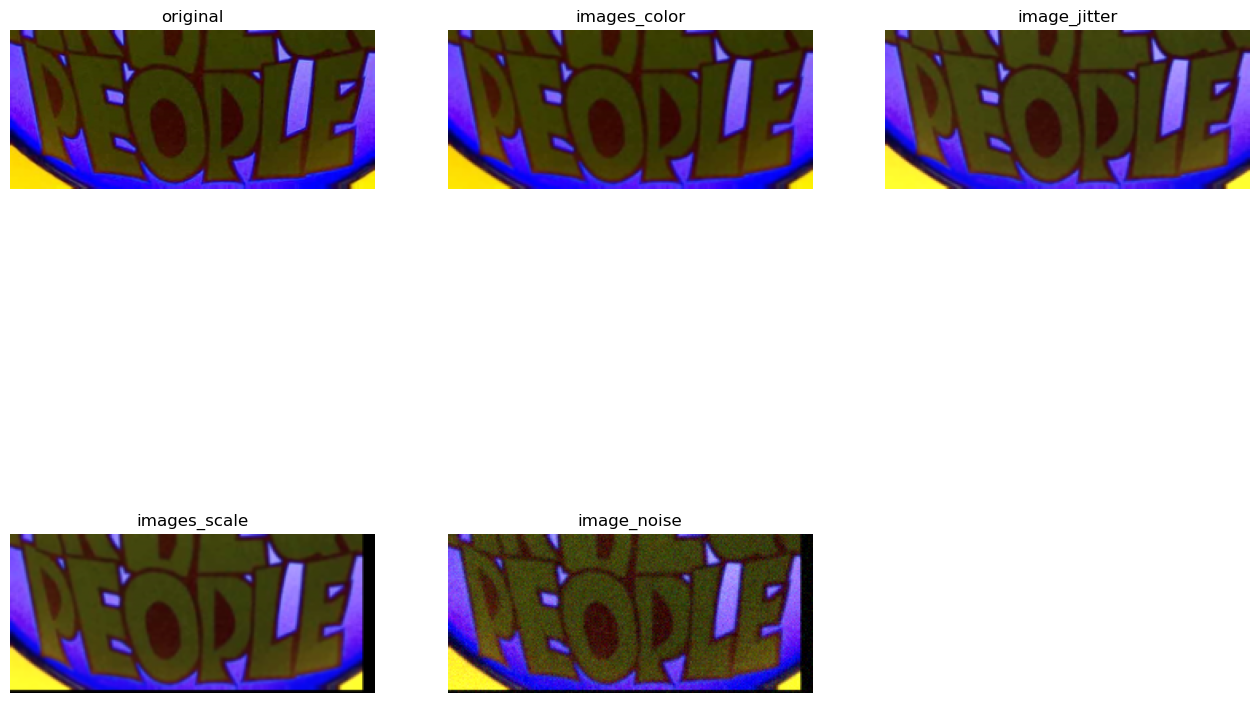

In [152]:
n = 0  # change this value to see other images from the batch;
# it must be in 0..batch_size-1 range

# from synsets import imagenet_synsets
import matplotlib.gridspec as gridspec

len_outputs = len(pipe_out)
# images_color, image_jitter, images_scale, image_noise
captions = [
    "original",
    "images_color",
    "image_jitter",
    "images_scale",
    "image_noise"
]

fig = plt.figure(figsize=(16, 12))
# plt.suptitle(imagenet_synsets[pipe_out[0].at(n)[0]], fontsize=16)
columns = 3
rows = int(math.ceil(len_outputs / columns))
gs = gridspec.GridSpec(rows, columns)

print("Affine transform matrix:")
print(pipe_out[1].at(n))

for i in range(len_outputs):
    plt.subplot(gs[i])
    plt.axis("off")
    plt.title(captions[i])
    pipe_out_cpu = pipe_out[0 + i].as_cpu()
    img_chw = pipe_out_cpu.at(n)
    plt.imshow((img_chw) / 255.0)